![alt text](https://cdn.newsbook.com.mt/wp-content/uploads/2019/03/0f40cb07fbf640d883755f420e91f6ec.jpg)

### Context 
This dataset is obtained from [Kaggle](https://www.kaggle.com/unsdsn/world-happiness). I have modified the data to contain only data from 2015 to 2017. This report ranks 155 countries by their happiness level through 6 indicators:

- economic production
- social support
- life expectancy 
- freedom 
- absence of corruption
- generosity

The last indicator is dystopia residual. Dystopia residual is "the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country".  Dystopia is a made up country that has the world's least happiest people. This made up country is high in corruption, low in average income, employment, etc. Dystopia residual is used as a benchmark and should be used side-by-side with the happiness score. 
- Low dystopia residual = low level of happiness 
- high dystopia residual = high level of happiness.

### Understanding the column data
- Country
- Happiness rank 
- Happiness score 
 * This is obtained from a sample of population. The survey-taker asked the respondent to rate their happiness from 1 to 10. 
- Economic (GDP per cap)
 * Extend of GDP that contributes to the happiness score
- Family
 * To what extend does family contribute to the happiness score 
- Health
 * Extend of health (life expectancy) contribute to the happiness score 
- Freedom
 * Extend of freedom that contribute to happiness. The freedom here represents the freedom of speech, freedom to pursue what we want, etc
- Trust (Government corruption)
 * Extend of trust with regards to government corruption that contribute to happiness score 
- Generosity 
 * Extend of generosity that contribute to happiness score 
- dystopia residual
- Year

#### Do note:
$ Happiness Score = Economic (GDP per cap) + Family + Health + Freedom + Trust + Generosity + Dystopia Residual $

## Let's get started!

In [0]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [0]:
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
from google.colab import files 
uploaded = files.upload()

Saving World_Happiness_2015_2017_.csv to World_Happiness_2015_2017_ (2).csv


In [0]:
# After uploading the file, we are able to see the name of the file saved as "World_Happiness_2015_2017.csv"
# Use pd.read_csv() to read the file and assign it to variable call "data"
data = pd.read_csv('World_Happiness_2015_2017_.csv')

# We then use data.head() to see the first 5 rows of data
data.head()

Country  Happiness Rank  ...  Dystopia Residual  Year
0  Switzerland               1  ...            2.51738  2015
1      Iceland               2  ...            2.70201  2015
2      Denmark               3  ...            2.49204  2015
3       Norway               4  ...            2.46531  2015
4       Canada               5  ...            2.45176  2015

[5 rows x 11 columns]

### Looking into data.shape() to see rows and columns
- We should be able to see (470,11) as output. 470 represents number of rows while 11 represents number of columns.
- We then use data.dtypes to identify the type for each column.
- The main purpose for this is that we will need to change the type if we want to manipulate data.


In [0]:
# Then what I do next is look into shape using data.shape(). This will tell me how many rows and columns there are.
data.shape

(470, 11)

In [0]:
# Now lets see data types using data.dtypes
data.dtypes

Country                           object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Year                               int64
dtype: object

### Looking into null values. There are numerous way you can deal with null, NaN or unknown values.
- Omitting rows with null/NaN values
  * This helps our output to be more robust and accurate
  * However this should only be done when we have sufficient data. If we have more than 50% NaN values, we may not be able to omit the affected rows.
- Replace these NaN and null values with mean or median
 * This saves us the worry for loss of information
 * This does increase our data variance and bias

To identify null values, we use **data.isnull().sum()**
- isnull() returns boolean (True or False). Is this value null? Yes or No?
- sum() calculate the number of True


In [0]:
# Lets calculate the number of null values
data.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

No null values. Great!

## Next up! Plotting!
- Here, we will want to see the relationship among attributes. My favourite way to visualise that is through seaborn's pairplot.
- This can be done using sns.pairplot(). 
 * I then adjust the layout to include a title call "FacetGrid plot", with fontsize of 20. I use adjust to adjust the spacing of margin and plot.


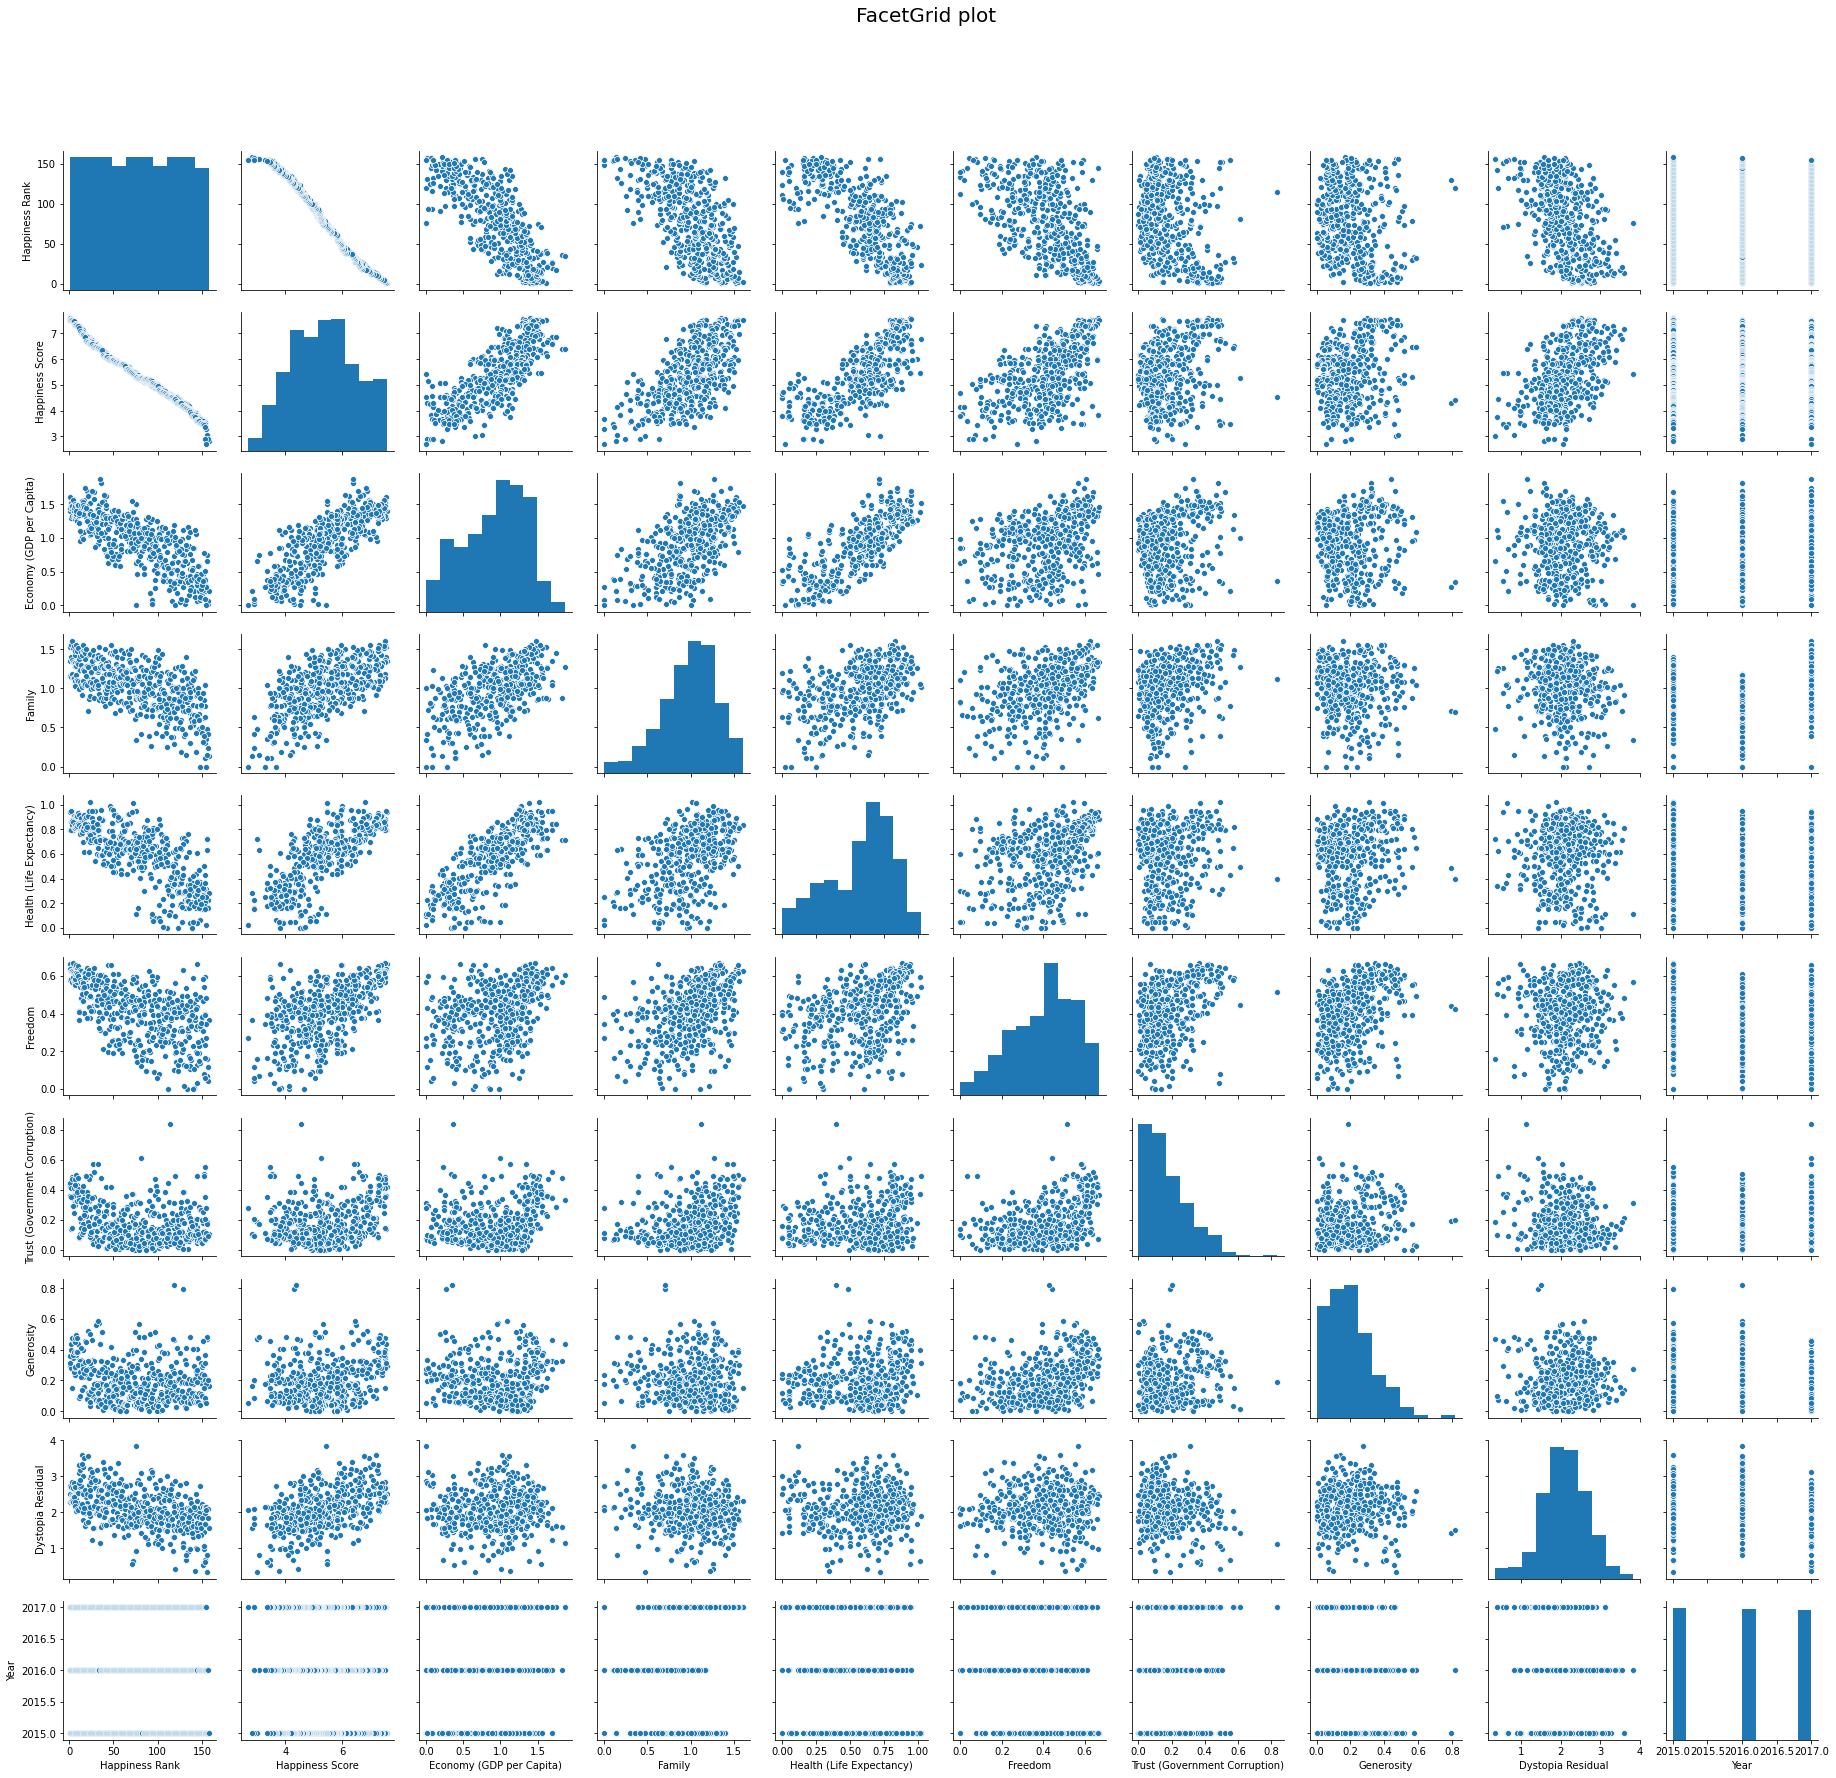

In [0]:
g = sns.pairplot(data)
g.fig.suptitle('FacetGrid plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

## What do we see here?

We see two types of plot. 
- Histograms
 * Look at the x axis and y axis of the histogram. There are the same! This shows the distribution of each attribute.
- Scatter plot
 * This shows the relationship between 2 attributes. We can see a strong linear correlation between Happiness Rank and Happiness Score. That is because the rank is determined by the score. 

What we are interested in finding out is the correlation between happiness score and each attribute. From the plot if we look at the second column from the left (Happiness score on x-axis), we do notice that econimic, family and health have positive linear correlation. Well, the truth is what you see may be different from what others see. We need to prove it through some form of statistics.

## Correlation between Happiness score and Economy: 


In [0]:
# Creating a list of attributes we want (just copy the column name)
econ_happiness = ['Happiness Score','Economy (GDP per Capita)']

# Creating a dataframe that only contains these attributes
econ_corr = data[econ_happiness]

# Finding correlation
econ_corr.corr()

Happiness Score  Economy (GDP per Capita)
Happiness Score                   1.00000                   0.78545
Economy (GDP per Capita)          0.78545                   1.00000

## What do we see here?
- Before we interpret the result we need to ask ourselves how high should the correlation coefficient be to be significant. How close to -1 or 1? For this purpose let's look to $R^2$!

In [0]:
#We can apply a siple calculation to get R Squared by using **2

economyR= 0.78545

print("R Squared for Economy is", economyR**2)

R Squared for Economy is 0.6169317025


## Why is $R^2$ better than R?
 * Interpretation is easy.
 * For this exercise we realise that the $R^2$ value is 0.617. This tells us that 61.7% of variation can be explained by the relationship between happiness score and Economy. 


Now let's move on with charting. 

Text(0.5, 1.0, 'Correlation graph for Happiness score vs Economy')

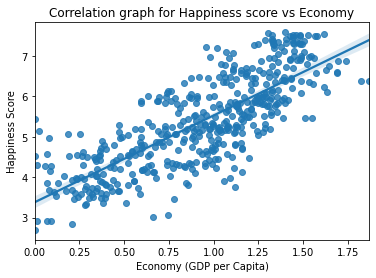

In [0]:
sns.regplot(data = econ_corr, x = 'Economy (GDP per Capita)', y = 'Happiness Score').set_title("Correlation graph for Happiness score vs Economy")

##What do we see?

Based on our R score for Economy, it makes sense that we would see a clear trend with little spread. Some outliers towards the lower range of Economy exists with high happiness scores. I wonder if this is from less developed countries who are less attuned to the rest of the world...

# Now let's look at some other attributes that might influence Happiness:

The 6 attributes we will look at are:
1. Family
2. Health
3. Freedom
4. Trust (Government corruption)
5. Generosity
6. Dystopia residual

The first thing we will do is add these to a DataFrame.

In [0]:
# Creating a list of attributes 
coef_happiness = ['Happiness Score','Family','Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']

# Creating a dataframe that only contains these attributes
happy_coef = data[coef_happiness]

# Finding correlation coefficient
happy_coef.corr()

Happiness Score  ...  Dystopia Residual
Happiness Score                       1.000000  ...           0.489747
Family                                0.636532  ...          -0.081537
Health (Life Expectancy)              0.748040  ...           0.057674
Freedom                               0.560353  ...           0.038422
Trust (Government Corruption)         0.282130  ...          -0.162386
Generosity                            0.221684  ...           0.047765
Dystopia Residual                     0.489747  ...           1.000000

[7 rows x 7 columns]

##What do we see here?

It appears that happiness score is positively correlated with all of our attributes with varying degrees of strength.

Lets take a look at our $R^2$ values to see how this holds up.

In [0]:
# Creating a new table from the previous table of correlation coefficients and applying a calculation to get the R-Squared values for all
Rsq = happy_coef.corr()
Rsq**2

Happiness Score  ...  Dystopia Residual
Happiness Score                       1.000000  ...           0.239852
Family                                0.405173  ...           0.006648
Health (Life Expectancy)              0.559564  ...           0.003326
Freedom                               0.313996  ...           0.001476
Trust (Government Corruption)         0.079597  ...           0.026369
Generosity                            0.049144  ...           0.002282
Dystopia Residual                     0.239852  ...           1.000000

[7 rows x 7 columns]

Based on our $R^2$ Values, it does not look like all of our attributes are strongly correlated with Happiness anymore. Only Family, Health, and Freedom appear to have a any significance, with the only other possibly significant attribute being Dystopia Residual.


##Now let's visualize!


Starting with Family:

Text(0.5, 1.0, 'Happiness score vs Family')

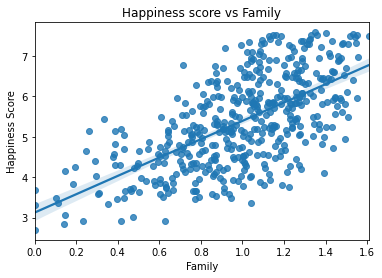

In [0]:
# plotting regression plot for Family
sns.regplot(data = happy_coef, x = 'Family', y = 'Happiness Score').set_title("Happiness score vs Family")

##What do we see?

The trend for family appears to be pretty consistent, as family goes up, so does happiness.

Now let's look at Health:

Text(0.5, 1.0, 'Happiness score vs Health')

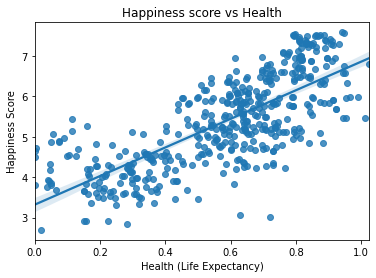

In [0]:
# plotting regression plot for Health

sns.regplot(data = happy_coef, x = 'Health (Life Expectancy)', y = 'Happiness Score').set_title("Happiness score vs Health")

Health also appears to have a pretty strong trend. We can see that there is a bit less of a spread among our data points as compared to family, which makes sense given the strong $R^2$.

What is interesting here however, is the number of median range happiness scores at Health scores below 0.2. Could these outliers be for the terminally ill who may have come to terms with thier fate? Interesting...

Lets take a look at Freedom:

Text(0.5, 1.0, 'Happiness score vs Freedom')

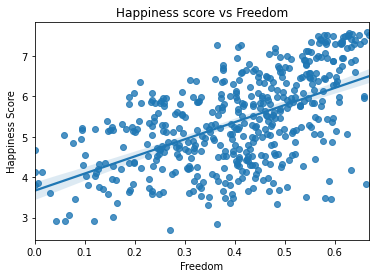

In [0]:
# plotting regression plot for Freedom
sns.regplot(data = happy_coef, x = 'Freedom', y = 'Happiness Score').set_title("Happiness score vs Freedom")

This seems to make sense for Freedom. Coming in as the 3rd strongest predictor, I expected to see a larger spread than with Health or Family, but still a pretty consistent trend.

Let's look at Trust:

Text(0.5, 1.0, 'Happiness score vs Trust')

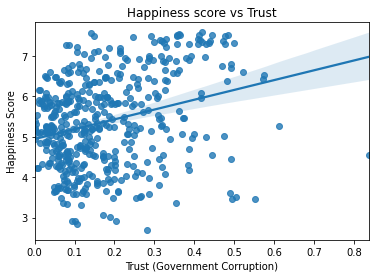

In [0]:
# plotting regression plot fo Trust

sns.regplot(data = happy_coef, x = 'Trust (Government Corruption)', y = 'Happiness Score').set_title("Happiness score vs Trust")

Trust seems to have little relationship with Happiness Score. Maybe trust in government really doesnt influence happiness? But remember, this data is from 2015 to 2017. If nothing particilarly bad happened to a country during this time, people may not really value their level in trust in government much... Out of site, out of mind?

Time to check out Generosity:

Text(0.5, 1.0, 'Happiness score vs Generosity')

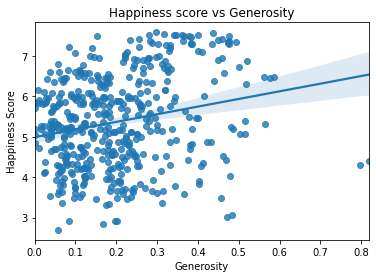

In [0]:
# plotting regression plot for Generosity

sns.regplot(data = happy_coef, x = 'Generosity', y = 'Happiness Score').set_title("Happiness score vs Generosity")

It doesn't look like there is much of a relationship at all. This one suprised me. I would expect Generosity and Happiness to go hand in hand.

Let's check out Dystopia Residual:

Text(0.5, 1.0, 'Happiness score vs Dystopia Residual')

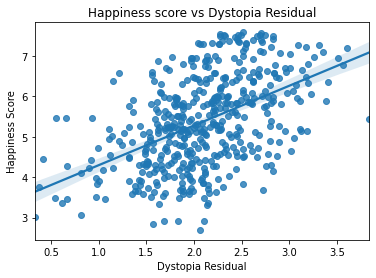

In [0]:
# plotting regression plot for Dystopia Residual

sns.regplot(data = happy_coef, x = 'Dystopia Residual', y = 'Happiness Score').set_title("Happiness score vs Dystopia Residual")

Dystopia Residual was one of our stronger predictors, but the visual isnt exactly your typical trend. Scores generally fall in the median range from about 1.5 to 3.0. Not many scores outside of that range, regardless of happiness score. 

This may make sense for economists. Dystopia residual is used as a benchmark. Sort of like a worst case scenaria for happiness. Scores can't be too low or too high without the countries themselves being on the extremes. It makes sense that a bench mark would be somewhat correlated.

Summary of Results:

Correlation Analysis revealed the following R & $R^2$ scores for each of our attributes as they relate to Happiness Score:

1. Family: R = 0.636532; $R^2$ = 0.405173
2. Health: R = 0.748040; $R^2$ = 0.559564
3. Freedom: R = 0.560353; $R^2$ = 0.313996
4. Trust: R = 0.282130; $R^2$ = 0.079597
5. Generosity: R = 0.221684; $R^2$ = 0.049144
6. Distopia Residual: R = 0.489747; $R^2$ = 0.239852

Based on this, we can see that Health, Family, and Freedom (respectively), are the strongest predictors of Happiness among these 6 attributes (not including Economy).

Trust and Generosity appear to be be the weakest predictors of Happiness. However, they are both somewhat predictive of Freedom, suggesting that they may have some indirect impact in the overall happiness equation as well.

